<a href="https://colab.research.google.com/github/Kommandjsdf/MachineLearning/blob/main/Sup_Unsup_Learning/Sup_Unsup_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)
visitors = np.random.randint(10, 100, 31)
revenue = np.random.randint(-3, 3, 31) * visitors + visitors * 5
print(visitors)
print(revenue)

[61 24 81 70 30 92 96 84 84 97 33 12 31 62 11 97 39 47 11 73 69 30 42 85
 67 31 98 58 68 51 69]
[427 168 567 280 150 460 192 336 504 388 198  24  93 310  22 485 273 141
  33 146 207 180 126 425 335 155 490 348 272 357 138]


In [5]:
data = {
    "visitors" : visitors,
    "revenue" : revenue
}

df = pd.DataFrame(data)
print(df)

    visitors  revenue
0         61      427
1         24      168
2         81      567
3         70      280
4         30      150
5         92      460
6         96      192
7         84      336
8         84      504
9         97      388
10        33      198
11        12       24
12        31       93
13        62      310
14        11       22
15        97      485
16        39      273
17        47      141
18        11       33
19        73      146
20        69      207
21        30      180
22        42      126
23        85      425
24        67      335
25        31      155
26        98      490
27        58      348
28        68      272
29        51      357
30        69      138


In [6]:
X = df[["visitors"]]
y = df["revenue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, random_state = 42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

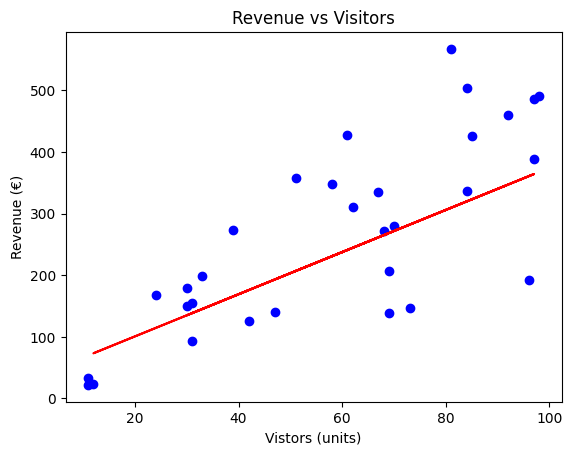

In [8]:
plt.scatter(X, y, color="blue")
plt.plot(X_test, y_pred, color="red")
plt.title("Revenue vs Visitors")
plt.xlabel("Vistors (units)")
plt.ylabel("Revenue (€)")
plt.show()

2. Кластеризація: Сегментація відвідувачів
Кластеризація дозволяє зрозуміти, які типи клієнтів відвідують кафе (регулярні відвідувачі, випадкові тощо).
Мета: Розподілити відвідувачів кафе на групи за їхньою поведінкою:

    Frequency (Частота візитів).
    Average Spend (Середній чек).

Результат: Відвідувачі згруповані в 3 категорії, наприклад:

    Регулярні клієнти з високим чеком.
    Рідкі клієнти з середнім чеком.
    Випадкові клієнти з низьким чеком.

In [9]:
np.random.seed(42)
frequency = np.random.randint(5, 60, 100)
average_spend = np.random.randint(2, 10, 100)

In [12]:
visitors_data = {
    "frequency" : frequency,
    "average_spend" : average_spend
}
visitors_df = pd.DataFrame(visitors_data)
visitors_df.head()

,frequency,average_spend
0,43,9
1,56,3
2,33,2
3,19,5
4,47,5


In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)
visitors_df["cluster"] = kmeans.fit_predict(visitors_df[["frequency", "average_spend"]])
print(visitors_df)

    frequency  average_spend  cluster
0          43              9        1
1          56              3        1
2          33              2        2
3          19              5        0
4          47              5        1
..        ...            ...      ...
95         20              4        0
96         49              4        1
97         22              7        2
98         51              5        1
99         57              3        1

[100 rows x 3 columns]


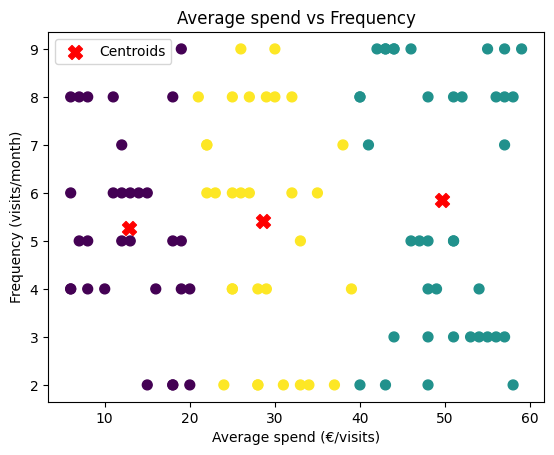

In [25]:
plt.scatter(visitors_df['frequency'], visitors_df['average_spend'], c=visitors_df['cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="red", marker="X", s=100, label="Centroids")
plt.title("Average spend vs Frequency")
plt.xlabel("Average spend (€/visits)")
plt.ylabel("Frequency (visits/month)")
plt.legend()
plt.show()